# **Algorithm Design Techniques**

## **Divide and Conquer**

**Divide:** Split the the problem into smaller subproblems that are solved recursively (except for base cases, which are solved directly)

**Conquer:** Combine solutions to subproblems into a solution of original problem

**Some Algorithms:**

<ul>
  <li>MergeSort(L)</li>

```
Base case: 
  if len(L) < 2
    return # List is already sorted
Divide: 
  split list L into 2 sublists, L1 and L2, of the same size, which will be sorted recursively
Conquer: 
  merge sorted sublists L1 and L2 into single sorted list L
```



  <li>QuickSort(L)</li>

```
Base case: 
  if len(L) < 2
    return # List is already sorted
Divide: 
  split list L into 2 sublists, L1, containing items that are smaller than L[0], and L2, 
  containing items that are greater or equalt to L[0], which will be sorted recursively
Conquer: 
  concatenate sorted sublists L1 and L2 into single sorted list L
```
  <li>Binary Search(L,m)</li>

  ```
Base cases: 
  if len(L) == 0
    return False # List is empty, m is not in L
  if m == middle element in L
    return True  # m is in L
Divide: 
  split list L into 2 sublists, L1 = L[:middle]  and L2 = L[middle+1:] 
  if m < middle element in L
    search for m in L1
  else
    search for m in L2
```
</ul>



**Running Times:**

<ul>
  <li>MergeSort(L)</li>

```
Base case: 
  T(n) = O(1) 
Divide: 
  T(n) = O(1)
Conquer: 
  T(n) = O(n)
```
Thus, for the general case, we make O(n) work and then make two recursive calls, each of size n/2

The recurrence  describing the running time is:

T(n) = 2T(n/2) + O(n)

Applying the Master method, a=2, b=2, k=1, b^k = 2^1 = 2

a == b^k, thus case 2 applies and

T(n) = O(n log n)


  <li>QuickSort(L)</li>


```
Base case: 
  T(n) = O(1) 
Divide: 
  T(n) = O(n)
Conquer: 
  T(n) = O(1)
```
Thus, for the general case, we make O(n) work and then make two recursive calls, each of size n/2

The recurrence  describing the running time is:

T(n) = 2T(n/2) + O(n)

Applying the Master method, a=2, b=2, k=1, b^k = 2^1 = 2

a == b^k, thus case 2 applies and

T(n) = O(n log n)



  <li>Binary Search(L,m)</li>

```
Base case: 
  T(n) = O(1) 
Divide: 
  T(n) = O(1)
Conquer: 
  T(n) = O(1)
```
Thus, for the general case, we make O(1) work and then make one recursive call of size n/2

The recurrence  describing the running time is:

T(n) = T(n/2) + O(1)

Applying the Master method, a=1, b=2, k=0, b^k = 2^0 = 1

a == b^k, thus case 2 applies and

T(n) = O(log n)
</ul>

Consider the quicksort algorithm:

In [1]:
import numpy as np

def quicksort(L):
    if len(L)<2:
        return L
    L1 = [x for x in L[1:] if x<L[0]]
    L2 = [x for x in L[1:] if x>=L[0]]
    return quicksort(L1) + [L[0]] + quicksort(L2)

L = list(np.random.permutation(8)*10)
print('Original list',L)
Ls = quicksort(L)
print('Sorted list',Ls)

Original list [40, 30, 10, 60, 70, 20, 0, 50]
Sorted list [0, 10, 20, 30, 40, 50, 60, 70]


If L is already sorted in ascending order, what will be the size of L1?

Answer: 0

If L is already sorted in ascending order, what will be the size of L2?

Answer: len(L) - 1

What is the recurrence that describes the running time of quicksort when L is already sorted? 

Answer: T(n) = T(n-1) + O(n)

What is the solution to that recurrence?


Since the recurrence doesn't have the form T(n) = aT(n/b) + n^k, we can't apply the Master Method. 

Let's iterate through the values of T, by repeatedly applying the equation. 

Ignoring constants:

Base case:

T(1) = 1

Repeatedly applying the recurrence: 
T(2) = T(1) + 2 = 1 + 2 = 3

T(3) = T(2) + 3 = 1 + 2 + 3 = 6

T(4) = T(3) + 4 = 1 + 2 + 3 + 4 = 10

In general:

T(n) = 1 + 2 + 3 + ... + (n-2) + (n-1) + n 

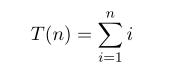



This is a very common summation in computer science. It can be solved by observing that the first and last items in the summarion add up to n+1, similarly, the second and next-to-last also add up to n+1, as do the third and next-to-next-to-last, and so on. Since we have n numbers, we can form n/2 pairs of numbers, each adding up to n+1. Thus:

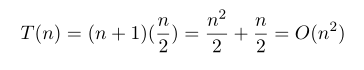

## **Greedy Algorithms**

A **greedy algorithm** works in phases, following the problem-solving strategy of making the locally optimal choice at each phase with the intent of finding a globally optimal solution. 

For most problems, a sequence of locally optimal choices will not lead to a globally optimal solution. 

However, greedy choices can usually be performed efficiently and for some problems, they actually lead to globally optimal solutions.


**Exercise:**

The following **greedy rules** are used by some well-known graph algorithms. 

Can you name the algorithm given the rule?

Rule: Add to the minimum spanning tree the lowest weight edge that does not generate a cycle

Algorithm: Kruskal's MST Algorithm

Rule: Add to the minimum spanning tree the lowest weight edge that connects the connected set C to the unconnected set V-C.

Algorithm: Prim's MST Algorithm

Rule: Find shorter paths going through the unknown vertex with the lowest distance, then discard that vertex.  

Algorithm: Dijkstra's single source shortests paths algorithm. 

## **Randomized Algorithms**

A **randomized algorithm** is an algorithm that makes (pseudo) random decisions in order to solve a problem.

There are three common uses for randomized algorithms:
<ul>
  <li> Use randomization to prevent long running times for some types of inputs. </li>
  <li> Use randomization to find a solution with high probability when exhaustive search is impossible or impractical.</li>
  <li> Simulation. Use randomization to simulate the behavior of complex systems.</li>
</ul>


### **Using randomization to prevent long running times for some types of inputs.**


Let's evaluate the running time of quicksort for several input sizes:

The running time for n = 10000 is: 0.023 s
The running time for n = 20000 is: 0.045 s
The running time for n = 30000 is: 0.069 s
The running time for n = 40000 is: 0.099 s
The running time for n = 50000 is: 0.129 s
The running time for n = 60000 is: 0.150 s
The running time for n = 70000 is: 0.186 s
The running time for n = 80000 is: 0.222 s
The running time for n = 90000 is: 0.272 s
The running time for n = 100000 is: 0.365 s
The running time for n = 110000 is: 0.406 s
The running time for n = 120000 is: 0.439 s
The running time for n = 130000 is: 0.502 s
The running time for n = 140000 is: 0.507 s
The running time for n = 150000 is: 0.488 s


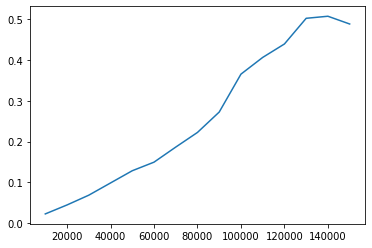

In [2]:
import time
import matplotlib.pyplot as plt

start = time.time()

array_lengths = np.arange(10000,160000,10000)
times = []
for n in array_lengths:
  L = list(np.random.permutation(n)) # This generates a randomly-ordered list
  start = time.time()
  Ls = quicksort(L)
  elapsed_time = time.time() - start
  times.append(elapsed_time)
  print('The running time for n = {} is:{:6.3f} s'.format(n,elapsed_time))

plt.figure()
plt.plot(array_lengths,times)


As we can see, the running time increases a little more than linearly (actually O(n log n)).

Now let's see what happens if the input list is already sorted.

In [3]:
import time
import matplotlib.pyplot as plt

start = time.time()

array_lengths = np.arange(10000,160000,10000)
times = []
for n in array_lengths:
  L = list(np.arange(n))  # This generates a sorted list
  start = time.time()
  Ls = quicksort(L)
  elapsed_time = time.time() - start
  times.append(elapsed_time)
  print('The running time for n = {} is:{:6.3f} s'.format(n,elapsed_time))

plt.figure()
plt.plot(array_lengths,times)

KeyboardInterrupt: 

The program crashes, as the recursion depth is n, instead of log n (we subtract 1 from n at every step, instead of dividing by 2).



**Solution using randomization:**

In normal quicksort, we use L[0] as the pivot to split the list. We will modify it to choose a random element from L as the pivot as follows:

In [ ]:
def quicksort_r(L):
    if len(L)<2:
        return L
    random_pivot = np.random.randint(len(L))
    L[0],L[random_pivot] = L[random_pivot], L[0] # Swap elements at first and randomly-chosen positions, then proceed normally 
    L1 = [x for x in L[1:] if x<L[0]]
    L2 = [x for x in L[1:] if x>=L[0]]
    return quicksort_r(L1) + [L[0]] + quicksort_r(L2)

Error: Session cannot generate requests

Now we can repeat the previous experiment:

In [95]:
import time
import matplotlib.pyplot as plt

start = time.time()

array_lengths = np.arange(10000,160000,10000)
times = []
for n in array_lengths:
  L = list(np.arange(n))  # This generates a sorted list
  start = time.time()
  Ls = quicksort_r(L)
  elapsed_time = time.time() - start
  times.append(elapsed_time)
  print('The running time for n = {} is:{:6.3f} s'.format(n,elapsed_time))

plt.figure()
plt.plot(array_lengths,times)

NameError: name 'quicksort_r' is not defined

Running times are just slightly higher than those of normal quicksort.

We can now verify that the running times are virtually the same whether the list is already sorted or not:

In [96]:
import time
import matplotlib.pyplot as plt

start = time.time()

array_lengths = np.arange(10000,160000,10000)
times = []
for n in array_lengths:
  L = list(np.random.permutation(n)) # This generates a randomly-ordered list
  start = time.time()
  Ls = quicksort(L)
  elapsed_time = time.time() - start
  times.append(elapsed_time)
  print('The running time for n = {} is:{:6.3f} s'.format(n,elapsed_time))

plt.figure()
plt.plot(array_lengths,times)

NameError: name 'quicksort' is not defined

**Example:** Building binary search trees.

Recall the BST class from previous lectures:

In [97]:
class BST:

    def __init__(self, key=None, left=None, right=None):
        if (key==None):
            self.is_empty = True
        else:
            self.is_empty = False
            self.key=key
            if left==None:
                self.left=BST()
            else:
                self.left=left
            if right==None:
                self.right=BST()
            else:
                self.right=right

    def draw(self,title=''):
        if self.is_empty:
            print('Empty tree, nothing to draw')
        else:
            dx ={}
            self.set_xy(dx)
            fig, ax = plt.subplots()
            self.draw_(ax, dx)
            ax.axis('off')
            fig.suptitle(title, fontsize=14)
            plt.show()

    def draw_(self, ax, dx):
        # Auxiliary function used by the drawing function
        if not self.is_empty:
            px, py = dx[self]
            for child in [self.left, self.right]:
                if not child.is_empty:
                    cx,cy = dx[child]
                    ax.plot([px,cx],[py,cy],linewidth=1,color='k')
                    child.draw_(ax,dx)
            ax.text(px,py, str(self.key), size=12,ha="center", va="center",bbox=dict(facecolor='w',boxstyle="circle"))

    def set_xy(self,dx,x=0,y=0):
        # Auxiliary function used by the drawing function, is find the image coordinates to draw the tree's nodes
        if not self.is_empty:
            next_x = self.left.set_xy(dx,x,y-1)
            dx[self] = (next_x,y)
            x = self.right.set_xy(dx,next_x+1,y-1)
        return x

    def insert(self,newkey):
        if self.is_empty:
            self.is_empty = False
            self.key=newkey
            self.left=BST()
            self.right=BST()
        else:
            if self.key>newkey:
                self.left.insert(newkey)
            else:
                self.right.insert(newkey)

Let's define a function to built a BST from a list.

In [91]:
def build_tree(L):
  T = BST()
  for i in L:
    T.insert(i)
  return T

Now let's build a tree from a randomly-ordered list.

In [92]:
tree_size =  16
L = list(np.random.permutation(tree_size))
T = build_tree(L)
T.draw('BST for randomly-ordered L')

NameError: name 'BST' is not defined

What happens if the list is already sorted?

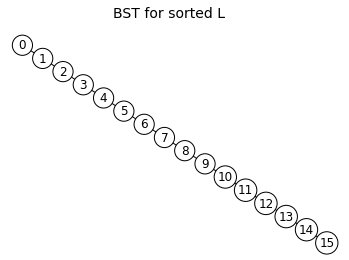

In [98]:
L = list(np.arange(tree_size))
T = build_tree(L)
T.draw('BST for sorted L')

As you can see, this produces a very unbalanced tree, which would result in O(n) search times (instead or O(n log n)).

Can randomization help us fix this problem?

**Exercise:** Write a modified version of build_tree(L) that produces similar results whether L is sorted or not. 

In [99]:
import random

def r_build_tree(L):
  T = BST()
  random.shuffle(L)
  for i in L:
    T.insert(i)
  return T

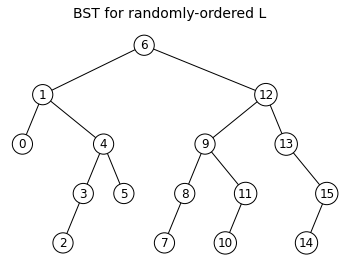

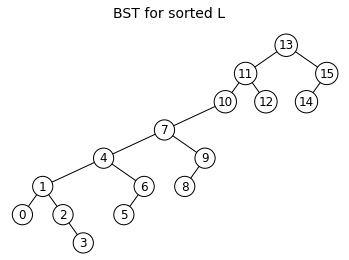

In [100]:
L = list(np.random.permutation(tree_size))
T = r_build_tree(L)
T.draw('BST for randomly-ordered L')

L = list(np.arange(tree_size))
T = r_build_tree(L)
T.draw('BST for sorted L')


### **Using randomization to find a solution with high probability when exhaustive search is impossible or impractical.**

**Equality testing**

How can we determine if two mathematical expressions f(x) and g(x) are equivalent? 

Reminder, f(x) and g(x) are equivalent if f(x) == g(x)  **for all values of x**.

To prove two functions f(x) and g(x) are not equivalent we need to find a value of x such that f(x) != g(x).

To prove two functions f(x) and g(x) are equivalent we need to test the equivalence on an infinite number of values, which is impossible, or use algebraic manipulation, which is difficult and sometimes impossible. 

A simple solution using randomization that works most of the time is to generate a random value of x, evaluate f(x) and g(x) and if the values are not equal,  we know the functions are not equivalent, otherwise we can repeat the test. If equality holds for a sufficiently large number of tests, we can be confident (but not absolutely sure) that the functions are equivalent.  


**Example:** 

Let's determine if (x+2)^2 == x^2 + 4x + 4

If the functions are given as strings, we can use the 'eval(s)' function in Python that receives a string s containing an expression in Python and executes it. 


In [102]:
import numpy as np

# Expressions to evaluate - they must be valid Python expressions:
f1= '(x+2)**2' 
f2 = 'x**2 + 4*x + 4' 

# Choose random value of x
x = np.random.randint(-500,501) # Generate random integer in the [-500,500] interval 

print('x=',x) 

# Evaluate function
print(f1,'=',eval(f1)) 
print(f2,'=',eval(f2))

# Evaluate equality
print('f1==f2 is',eval(f1+'=='+f2))



x= 33
(x+2)**2 = 1225
x**2 + 4*x + 4 = 1225
f1==f2 is True


Can we conclude that the equality holds?

Not necesarily.

Consider the following example:



In [ ]:
# Expressions to evaluate - they must be valid Python expressions:
f1 = 'x%10 + 1' 
f2 = '(x+1)%10' 

# Choose random value of x
x = np.random.randint(0,100) 

print('x=',x) 

# Evaluate function
print(f1,'=',eval(f1)) 
print(f2,'=',eval(f2))

# Evaluate equality
print('f1==f2 is',eval(f1+'=='+f2))

f1 and f2 are not equivalent. For example f1(9) = 10 and f2(9) = 0. But for most values of x, they are equal. Thus, testing on a single value of x is not enough. 

Although, in principle, we would need an infinite number of tests, if the equality holds for a large number of tests, we can say the equality holds *with high probability*.

In [4]:
def equal(f1,f2,min_x = 0, max_x =1000000, trials=1000):
  for t in range(trials):
    x = np.random.randint(min_x, max_x) 
    y1 = eval(f1)
    y2 = eval(f2)
    if y1!=y2:
      return False # If y1!=y2 for 1 value of x, that shows f1!=f2
  return True # If equality passes all tests, we believe f1==f2

In [ ]:
f1 = 'x%10 + 1' 
f2 = '(x+1)%10' 
print(equal(f1,f2))

In [5]:
f1= '(x+2)**2' 
f2 = 'x**2 + 4*x + 4' 
print(equal(f1,f2))

True


How about functions with real (floating point) parameters?

Let's modify the function to generate floating point values for x (thus functions that use operations restricted to integers, such as %, won't work).

In [103]:
def equal(f1,f2,min_x = -100, max_x = 100, trials=1000):
  for t in range(trials):
    x = np.random.uniform(min_x, max_x) 
    y1 = eval(f1)
    y2 = eval(f2)
    if y1!=y2:
      return False # If y1!=y2 for 1 value of x, that shows f1!=f2
  return True # If equality passes all tests, we believe f1==f2

We can now evaluate as before:

In [ ]:
f1= '(x+2)**2' 
f2 = 'x**2 + 4*x + 4' 
print(equal(f1,f2))

The function now returns the wrong results!

Let's print the values of y1 and y2 that make the function return False

In [35]:
def equal(f1,f2,min_x = -100, max_x = 100, trials=1000):
  for t in range(trials):
    x = np.random.uniform(min_x, max_x) 
    y1 = eval(f1)
    y2 = eval(f2)
    if y1!=y2:
      print(y1,y2)
      return False # If y1!=y2 for 1 value of x, that shows f1!=f2
  return True # If equality passes all tests, we believe f1==f2

In [87]:
np.random.seed(0)
f1= '(x+2)**2' 
f2 = 'x**2 + 4*x + 4' 
#print(equal(f1,f2))

x=['20', '12', '10', '6', '15', '100']
for i in x:
    print(equal('max('+i+'**2,100)', i+'*'+i))

True
True
True
100 36
False
True
True


The problem is that, due to the finite precision of the computer's representation of floating point numbers, two expressions that are actually equal, are evaluated to slightly different values.

We can correct this problem by returning 'False' only when the difference between y1 and y2 is larger than some threshold. 

The resulting code is as follows:

In [6]:
def equal(f1,f2,min_x = -100, max_x = 100, trials=1000, thr = 1e-6):
  for t in range(trials):
    x = np.random.uniform(min_x, max_x) 
    y1 = eval(f1)
    y2 = eval(f2)
    if np.abs(y1-y2)>thr:
      print(y1,y2)
      return False # If y1!=y2 for 1 value of x, that shows f1!=f2
  return True # If equality passes all tests, we believe f1==f2

In [7]:
np.random.seed(0)
f1= '(x+2)**2' 
f2 = 'x**2 + 4*x + 4' 
print(equal(f1,f2))

True


**Exercise:**

Modify the code above to determine which of the following trigonometric 'identities' are true:

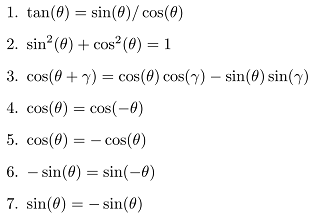

## **Backtracking**

Clever implementation of exhaustive search.
 
Idea: when faced with a decision, make one choice, if that choice does not work, backtrack and try a different choice


**The Subset-sum problem**

Given a set of positive integers *S={s1,s2,…,sn}* and an integer *g*, is there a subset of *S* whose members add up to *g*?

For example, if *S = {2,3,6,10}* and *g = 8*, the answer is True, since *g = 2+6*
if *S = {2,3,6,10}* and *g = 14*, the answer is False, since no subset of *S* adds up to *14*.


**A short digression: Subset-sum and NP-completeness**


<ul>
  <li>Surprisingly, no algorithm has been invented for subset sum that is significantly faster than trying all possible subsets of S (of which there are 2^n)</li>
  <li>Perhaps more surprisingly, nobody has been able to prove that it is impossible to solve subset sum in less than O(2^n) </li>
  <li>Given a candidate solution (a subset of S), we can easily verify whether it is correct (just by adding the integers and comparing with g) </li>
</ul>

There is a class of problems that share the three features above, they are called NP-complete problems.

**Solving subset-sum using backtracking**

For every element s in S, we must choose whether to take s or not; if the choice does not work, we backtrack and try the opposite choice.

Consider the problem subset_sum(S,g), where S is represented as a list (of positive integers) and g is a positive integer.

If we decide to take S[0], subset_sum(S,g) has a solution if there is a subset of S[1:] that adds up to g - S[0].

If we decide not to take S[0], subset_sum(S,g) has a solution if there is a subset of S[1:] that adds up to g.

Thus we can solve the problem recursively. We first must find the base cases:

if g == 0, return True, since the empty set adds up to 0 and is a subset of all sets.

if g < 0, return False, since S can only contain positive integers.

if g > 0 and S is empty, return False since the sum of S (and all its subsets) is 0.

Putting this in code:




In [8]:
def subsetsum(S,g):
    # Determines if there is a subset of S that adds up to g, where elements of S are positive integers
    if g==0: 
        return True
    if g<0 or len(S)==0:
        return False
    if subsetsum(S[1:],g-S[0]):  # Take S[0]
      return True
    else: # Backtrack
      return subsetsum(S[1:],g) # Don't take S[0]

In [9]:
S = [2, 4, 7, 11, 16]
for g in range(42):
  print('subsetsum(',S,',',g,') =',subsetsum(S,g))

subsetsum( [2, 4, 7, 11, 16] , 0 ) = True
subsetsum( [2, 4, 7, 11, 16] , 1 ) = False
subsetsum( [2, 4, 7, 11, 16] , 2 ) = True
subsetsum( [2, 4, 7, 11, 16] , 3 ) = False
subsetsum( [2, 4, 7, 11, 16] , 4 ) = True
subsetsum( [2, 4, 7, 11, 16] , 5 ) = False
subsetsum( [2, 4, 7, 11, 16] , 6 ) = True
subsetsum( [2, 4, 7, 11, 16] , 7 ) = True
subsetsum( [2, 4, 7, 11, 16] , 8 ) = False
subsetsum( [2, 4, 7, 11, 16] , 9 ) = True
subsetsum( [2, 4, 7, 11, 16] , 10 ) = False
subsetsum( [2, 4, 7, 11, 16] , 11 ) = True
subsetsum( [2, 4, 7, 11, 16] , 12 ) = False
subsetsum( [2, 4, 7, 11, 16] , 13 ) = True
subsetsum( [2, 4, 7, 11, 16] , 14 ) = False
subsetsum( [2, 4, 7, 11, 16] , 15 ) = True
subsetsum( [2, 4, 7, 11, 16] , 16 ) = True
subsetsum( [2, 4, 7, 11, 16] , 17 ) = True
subsetsum( [2, 4, 7, 11, 16] , 18 ) = True
subsetsum( [2, 4, 7, 11, 16] , 19 ) = False
subsetsum( [2, 4, 7, 11, 16] , 20 ) = True
subsetsum( [2, 4, 7, 11, 16] , 21 ) = False
subsetsum( [2, 4, 7, 11, 16] , 22 ) = True
subsetsum( [

We can modify the code to return that subset of S that adds up to g, if it exists, or None, if there is no such subset.

In [13]:
def subsetsum(S,g):
    # Determines if there is a subset of S that adds up to g, where elements of S are positive integers
    if g==0: 
        return []
    if len(S)==0:
        return None
    s1 = subsetsum(S[1:],g-S[0])  # Take S[0]
    if s1!= None:
        return [S[0]] + s1
    else: # Backtrack
      return subsetsum(S[1:],g) # Don't take S[0]

s1 = subsetsum([5,2,1],-1)
s1 =None
return subsetsum([5,2,1],7) 
return [5,2] 


subsetsum([8,5,2,1], 4)

s1 = subsetsum([5,2,1], -4) = None
return subsetsum([5,2,1], 4) = None


In [90]:
S = [15, 10, 7, 4, 2]
for g in range(1,10):
  print('subsetsum(',S,',',g,') =',subsetsum(S,g))

subsetsum( [15, 10, 7, 4, 2] , 1 ) = None
subsetsum( [15, 10, 7, 4, 2] , 2 ) = [2]
subsetsum( [15, 10, 7, 4, 2] , 3 ) = None
subsetsum( [15, 10, 7, 4, 2] , 4 ) = [4]
subsetsum( [15, 10, 7, 4, 2] , 5 ) = None
subsetsum( [15, 10, 7, 4, 2] , 6 ) = [4, 2]
subsetsum( [15, 10, 7, 4, 2] , 7 ) = [7]
subsetsum( [15, 10, 7, 4, 2] , 8 ) = None
subsetsum( [15, 10, 7, 4, 2] , 9 ) = [7, 2]


**Exercise**

Modify subsetsum to also work when S may have negative values and g may also be negative.



In [17]:
S = [-5, -2,  4,  7, 11, 16]
for g in range(-8, 36):
  print('subsetsum(',S,',',g,') =',subsetsum(S,g))

subsetsum( [-5, -2, 4, 7, 11, 16] , -8 ) = None
subsetsum( [-5, -2, 4, 7, 11, 16] , -7 ) = [-5, -2]
subsetsum( [-5, -2, 4, 7, 11, 16] , -6 ) = None
subsetsum( [-5, -2, 4, 7, 11, 16] , -5 ) = [-5]
subsetsum( [-5, -2, 4, 7, 11, 16] , -4 ) = None
subsetsum( [-5, -2, 4, 7, 11, 16] , -3 ) = [-5, -2, 4]
subsetsum( [-5, -2, 4, 7, 11, 16] , -2 ) = [-2]
subsetsum( [-5, -2, 4, 7, 11, 16] , -1 ) = [-5, 4]
subsetsum( [-5, -2, 4, 7, 11, 16] , 0 ) = []
subsetsum( [-5, -2, 4, 7, 11, 16] , 1 ) = None
subsetsum( [-5, -2, 4, 7, 11, 16] , 2 ) = [-5, 7]
subsetsum( [-5, -2, 4, 7, 11, 16] , 3 ) = None
subsetsum( [-5, -2, 4, 7, 11, 16] , 4 ) = [-5, -2, 4, 7]
subsetsum( [-5, -2, 4, 7, 11, 16] , 5 ) = [-2, 7]
subsetsum( [-5, -2, 4, 7, 11, 16] , 6 ) = [-5, 4, 7]
subsetsum( [-5, -2, 4, 7, 11, 16] , 7 ) = [7]
subsetsum( [-5, -2, 4, 7, 11, 16] , 8 ) = [-5, -2, 4, 11]
subsetsum( [-5, -2, 4, 7, 11, 16] , 9 ) = [-5, -2, 16]
subsetsum( [-5, -2, 4, 7, 11, 16] , 10 ) = [-5, 4, 11]
subsetsum( [-5, -2, 4, 7, 11, 16] , 11 

## **Dynamic Programming**

Recall the compound interest rule for the design of recursive functions: never repeat the same computation in separate recursive calls.

Also, recall Fibonacci numbers, defined recursively as follows:

f(0) = 0

f(1) = 1

f(n) = f(n-1) + f(n-2)

The straighforward implementation of a function to compute Fibonacci numbers breaks the compound interest rule. 

```
def f(n):
	if n<2:
		return n
	return f(n-1) + f(n-2)
```

Calling f(6) will result in the following recursion tree:

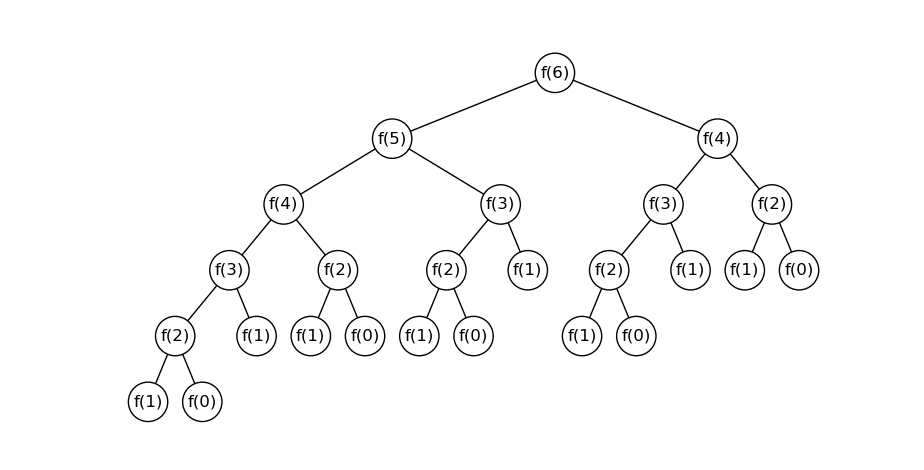

Which results in a lot of repeated work.

How many times is each call repeated?

Number of calls:

f(6) - 1

f(5) - 1

f(4) - 2

f(3) - 3

f(2) - 5

f(1) - 8

f(0) - 5

In fact, the number of calls grows in ecxactly the same way as the Fibonacci numbers!

In a call to f(n), f(1) will be called f(n) times!

Let's examine the effects of this repeated computation:




In [15]:
def f(n):
    if n<2:
        return n
    return f(n-1) + f(n-2)

In [106]:
import time
import matplotlib.pyplot as plt

start = time.time()

for n in range(11):
  start = time.time()
  fn = f(n)
  elapsed_time = time.time() - start
  print('fib({}) = {}'.format(n,fn))
  print('The running time for n = {} is: {:8.6f} s'.format(n,elapsed_time))


fib(0) = 0
The running time for n = 0 is: 0.000000 s
fib(1) = 1
The running time for n = 1 is: 0.000000 s
fib(2) = 1
The running time for n = 2 is: 0.000000 s
fib(3) = 2
The running time for n = 3 is: 0.000000 s
fib(4) = 3
The running time for n = 4 is: 0.000000 s
fib(5) = 5
The running time for n = 5 is: 0.000000 s
fib(6) = 8
The running time for n = 6 is: 0.000000 s
fib(7) = 13
The running time for n = 7 is: 0.000000 s
fib(8) = 21
The running time for n = 8 is: 0.000000 s
fib(9) = 34
The running time for n = 9 is: 0.000000 s
fib(10) = 55
The running time for n = 10 is: 0.000000 s


The running time roughly doubles every time we increase n by 1. If n = 50, the running time would be the running time for 40 (about 45 seconds, or 0.75 minutes) times 2^10, which is about 1000.  

Thus T(50) ~= 45,000 seconds, which is over 12 hours. 

T(60) ~= 45,000,000 seconds, which is over 12,000 hours, which is almost a year and a half. 

T(60) ~= 4.5 e7 seconds

T(70) ~= 4.5 e10 seconds

T(80) ~= 4.5 e13 seconds

T(90) ~= 4.5 e16 seconds

T(100) ~= 4.5 e19 seconds, which is about 100 times the age of the universe!


By storing the values of the previous 2 Fibonacci numbers in order to avoid repeated computation, we can hugely speed-up the computation:

In [30]:
def f(n):
    if n<2:
        return n
    f1 = 1  # Stores f(n-1)
    f2 = 0  # Stores f(n-2)
    for i in range(2,n+1):
        fn = f1 + f2    # Compute f(n)
        f1, f2 = fn, f1 # Update f1 and f2 for next iteration
    return fn

In [34]:
import time
import matplotlib.pyplot as plt

start = time.time()

for n in range(8):
  start = time.time()
  fn = f(n)
  elapsed_time = time.time() - start
  print('fib({}) = {}'.format(n,fn))
  print('The running time for n = {} is: {:8.6f} s'.format(n,elapsed_time))

fib(0) = 0
The running time for n = 0 is: 0.000000 s
fib(1) = 1
The running time for n = 1 is: 0.000000 s
fib(2) = 1
The running time for n = 2 is: 0.000000 s
fib(3) = 2
The running time for n = 3 is: 0.000000 s
fib(4) = 3
The running time for n = 4 is: 0.000000 s
fib(5) = 5
The running time for n = 5 is: 0.000000 s
fib(6) = 8
The running time for n = 6 is: 0.000000 s
fib(7) = 13
The running time for n = 7 is: 0.000000 s


The idea of storing results of subproblems to avoid repeated computation is the basis of dynamic programming. 



**Elements of dynamic programming** 
1.   Recursively define the value of an optimal solution 
2.   Compute solutions to sub-problems, storing them in case repeated subproblems appear
2.   Compute value of optimal solution combining solutions to sub-problems


**Edit Distance**

Given two strings S1 and S2, what is the minimum number of elementary character operations (insertions, deletions, or replacements) needed to convert S1 into S2?

For example, the edit distance form MINER to ONLINE is 4 
(replace M by O, insert N, insert L, remove R)

It has applications in bioinformatics (comparing DNA sequences, proteins, etc.), spell checkers, and many others. 


Edit Distance - Recursive solution



```
Base cases:
if len(S1) == 0:
	return len(S2)  # insert every character of S2
if len(S2) == 0
	return len(S1)  # delete every character of S1
Recursive cases:
if S1[0] == S2[0]:  # First characters in both strings match
    return edit_distance(S1[1:],S2[1:]) 
else:
    dist_replace = 1 + edit_distance(S1[1:],S2[1:]) 
    dist_insert = 1 + edit_distance(S1,S2[1:])
    dist_delete = 1 + edit_distance(S1[1:],S2)
    return min(dist_replace, dist_insert, dist_delete)
```

In [5]:
def edit_distance(S1,S2):
  #print('S1=',S1,'S2=',S2)
  if len(S1) == 0:
    return len(S2)  # insert every character of S2
  if len(S2) == 0:
    return len(S1)  # delete every character of S1
  # Recursive cases:
  if S1[0] == S2[0]:  # First characters in both strings match
    return edit_distance(S1[1:],S2[1:]) 
  else:
    dist_replace = 1 + edit_distance(S1[1:],S2[1:]) 
    dist_insert = 1 + edit_distance(S1,S2[1:])
    dist_delete = 1 + edit_distance(S1[1:],S2)
    return min(dist_replace, dist_insert, dist_delete)

In [ ]:
d = edit_distance('MINER','ONLINE')
print(d)

As with Fibonacci numbers, this recursive solution will lead to lots of repeated computation.

This partial recursion tree shows some of the repeated recursive calls resulting from a call to edit_distance('MINER','ONLINE')

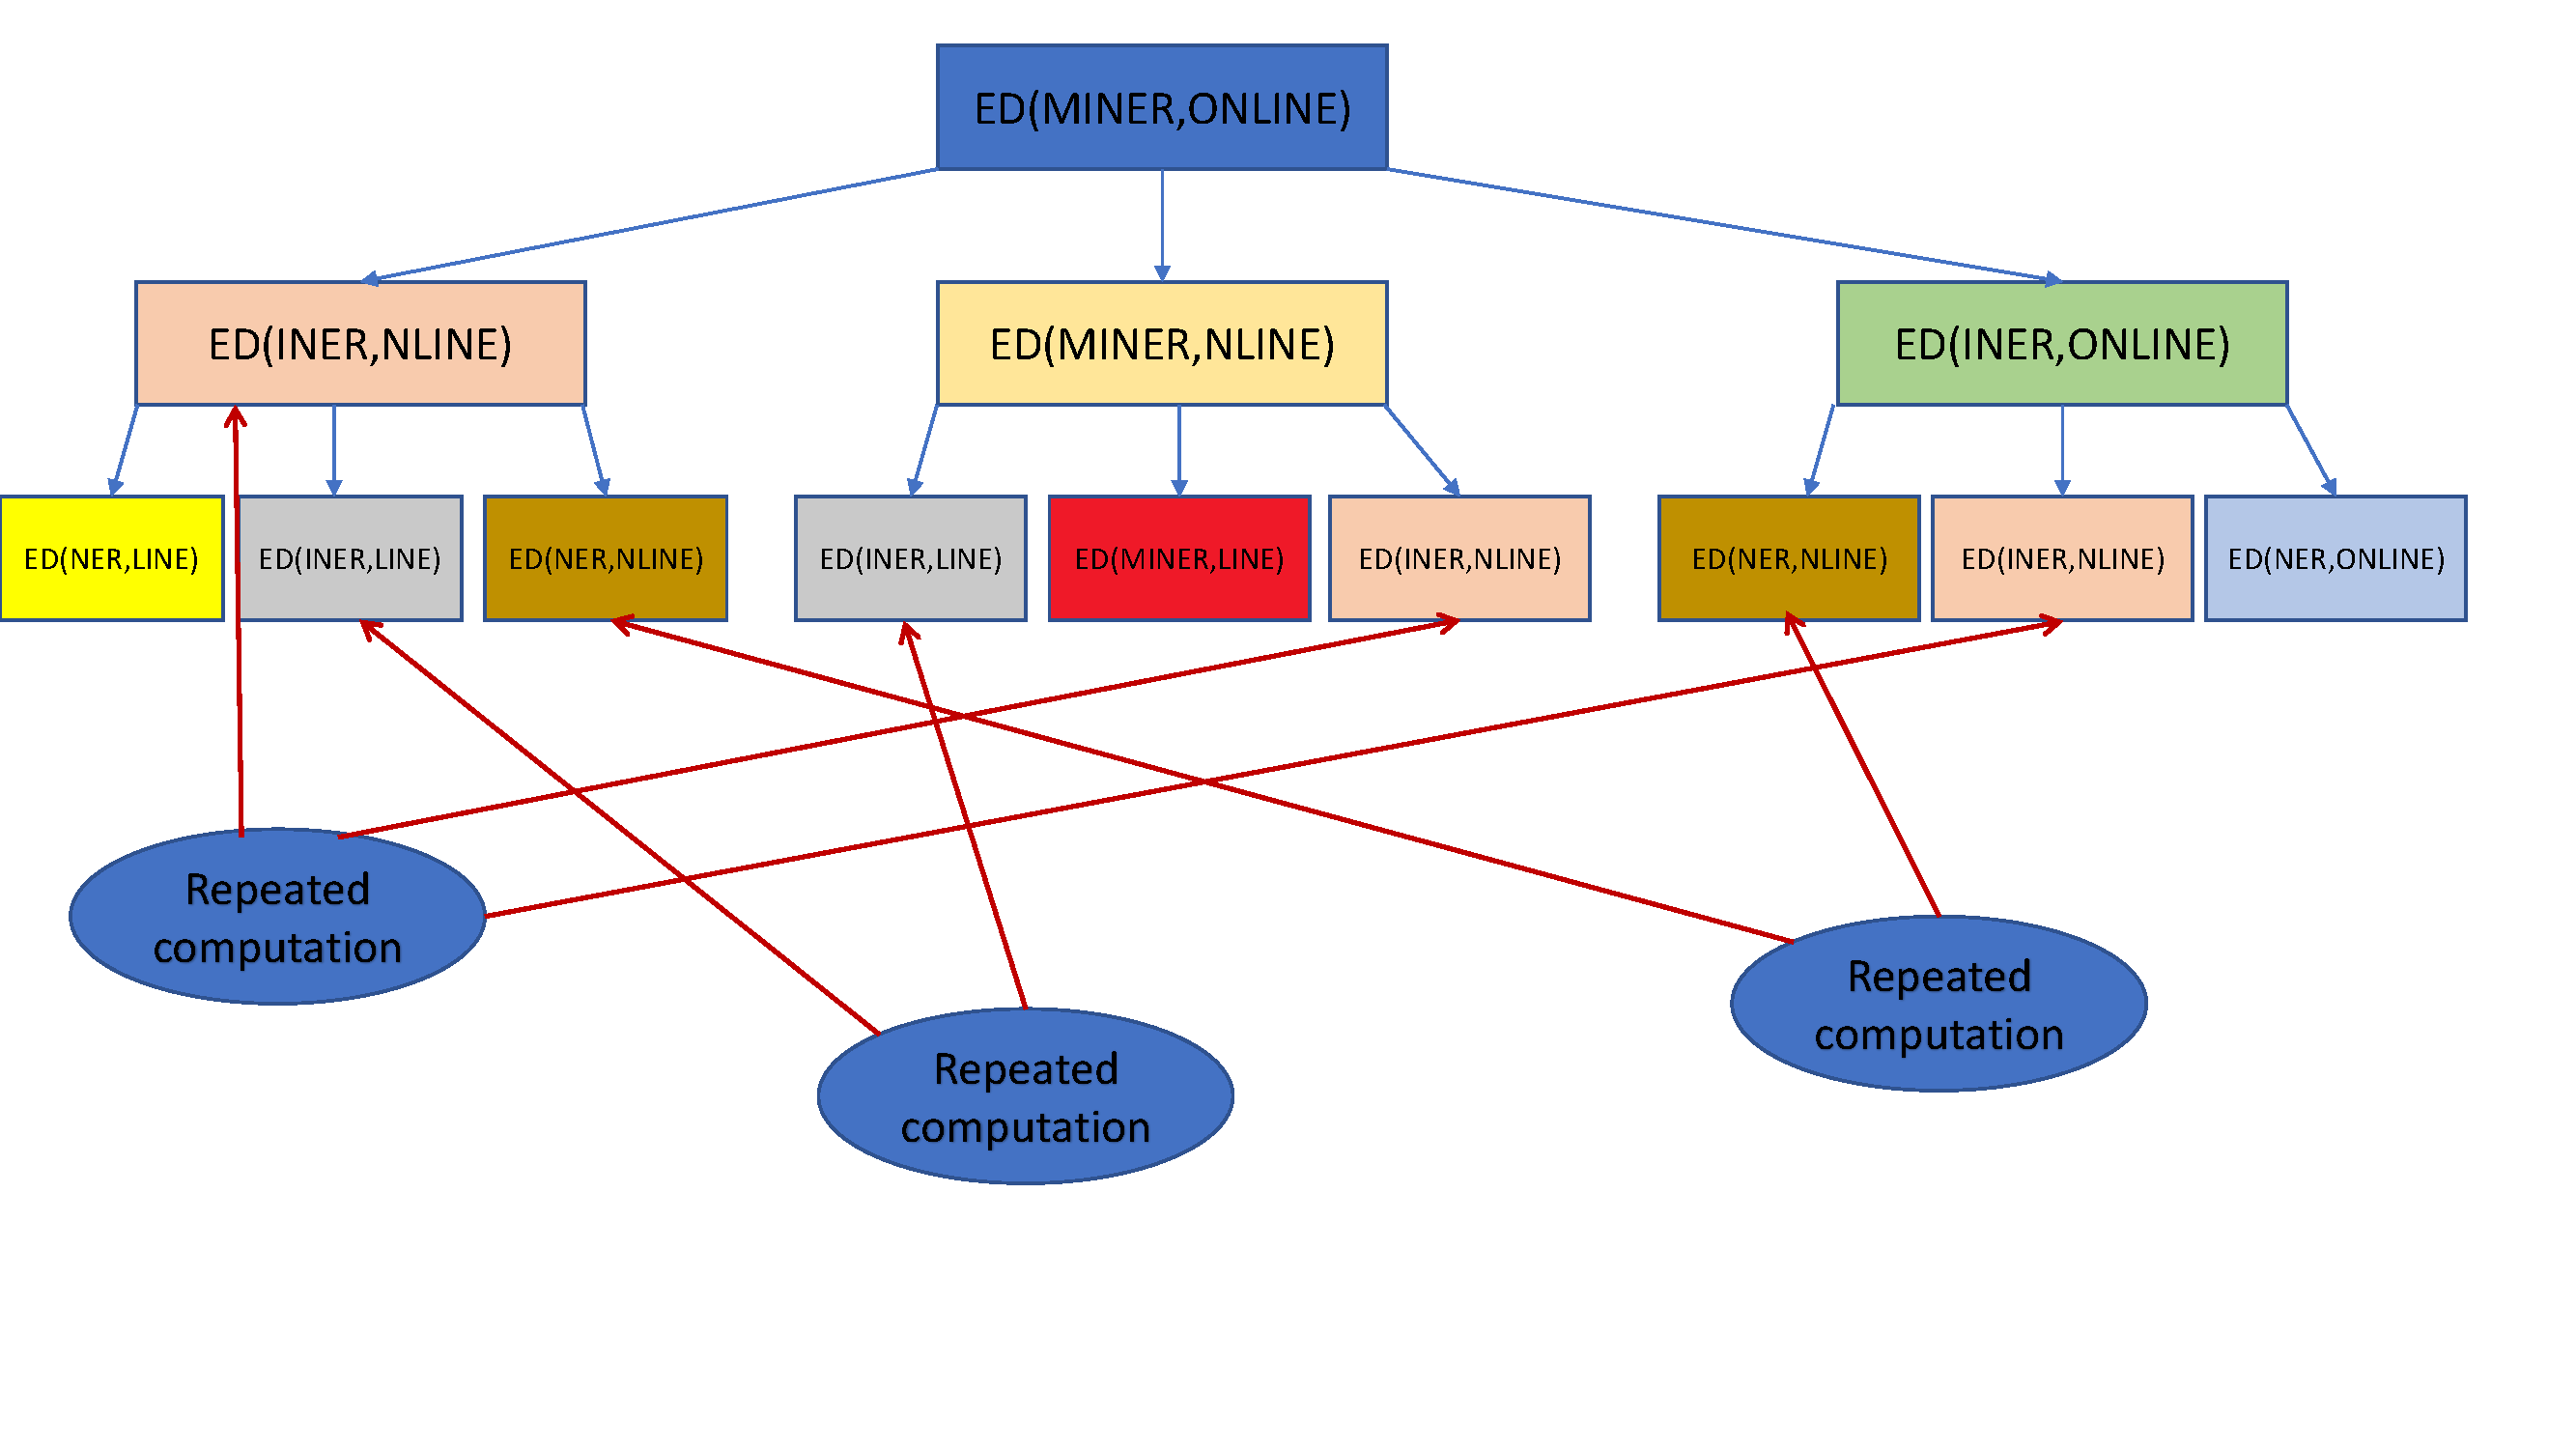

For Fibonacci numbers, we needed two variables to store the values of the two previous Fibonacci numbers. 

To compute the edit distance from string S1 to string S2 using dynamic programming, we will use a 2D array D of size len(S1) + 1 by len(S2) + 1, where:  

```
D[i,j] = edit_distance(S1[i:], S2[j:])
```

The figure below shows where some edit distance values in the computation of edit_distance('MINER','ONLINE') would be stored. 




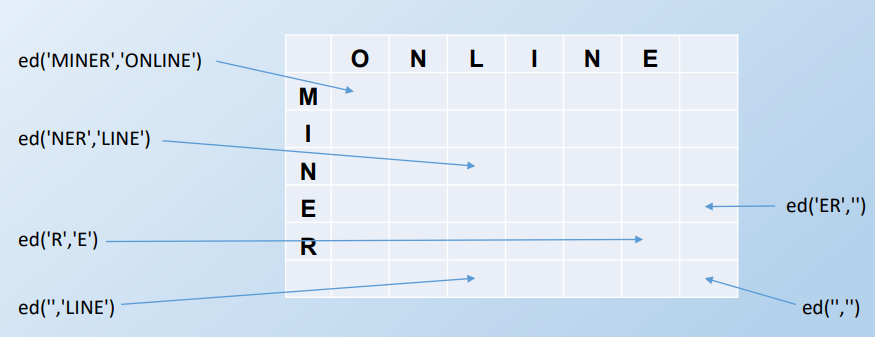

We can fill out some parts of the table using the base cases in the recursive formulation. When S1 is the empty string, edit_distance(S1,S2) = len(S2); similarly, when S2 is the empty string, edit_distance(S1,S2) = len(S1). 

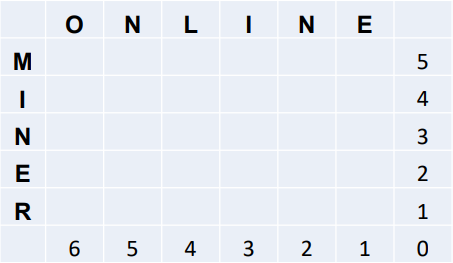

To compute edit_distance(S1,S2), or, equivalently, edit_distance(S1[0:],S2[0:]) in the recursive formulation, we need to compute dist_replace, dist_insert, and dist_delete. To compute  dist_replace we need the value of edit_distance(S1[1:],S2[1:]); to compute  dist_insert we need the value of edit_distance(S1[0:],S2[1:]); and  to compute  dist_delete we need the value of edit_distance(S1[1:],S2[0:]). 

In the dynamic programming formulation, edit_distance(S1[1:],S2[1:]), edit_distance(S1[0:],S2[1:]), and edit_distance(S1[1:],S2[0:]) would be stored in D[1,1], D[0,1] and D[1,0], respectively. 

In general, to compute D[i,j], we need the values of D[i+1,j+1], D[i+1,j] and D[i,j+1], which are the 3 neighbors below and to the right of D[i,j]. 

Looking at the table, after filling out the last row and column using base cases, we can find the value of D[len(S1)-1,len(S2)-1], since we already know the values of D[len(S1),len(S2)], D[len(S1),len(S2)-1], and D[len(S1)-1,len(S2)].

D[4,5] = 1 + min(D[5,6], D[4,6], D[5,5]) = 1 + min(0,1,1) = 1 + 0 = 1

Thus edit_distance('R','E') = 1





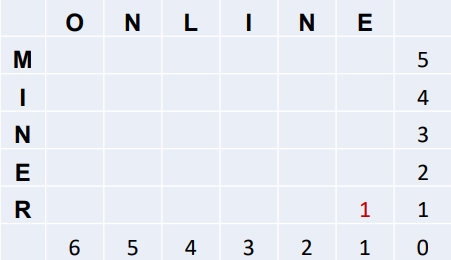

From here we can continue going backwards by column and row until we reach the top left corner. 

The following function implement the edit distance algorithm with dynamic programming. 

In [7]:
def edit_distance(s1,s2,print_array=False):
    # Finds edit distance from s1 to s2
    # If return_array is True it will return that array containing edit distances for all substrings of s1 and s2
    d = np.zeros((len(s1)+1,len(s2)+1),dtype=int)
    d[-1,:] = len(s2)-np.arange(len(s2)+1)  # Fill out last row
    d[:,-1] = len(s1)-np.arange(len(s1)+1)  # Fill out last column
    for i in range(len(s1)-1,-1,-1):      # Go backwards, since base case is in last row
        for j in range(len(s2)-1,-1,-1):  # Go backwards, since base case is in last columns
            if s1[i] ==s2[j]: # If there is a match, copy diagonal element 
                d[i,j] =d[i+1,j+1]
            else:             # No match
                d[i,j] = 1 + min(d[i,j+1],d[i+1,j+1],d[i+1,j]) # Add 1 to minimum of 3 neighbors 
    if print_array:
        print_ed_array(d,s1,s2)
    return d[0,0]

In [2]:
def print_ed_array(D,S1,S2):
    S1+= ' '
    S2 = ' '+S2
    for c in S2:
        print(c, end = ' ')
    print()
    for i in range(D.shape[0]):
        print(S1[i], end = ' ')
        for c in D[i]:
            print(c, end = ' ')
        print()

In [8]:
import numpy as np

In [29]:
S1, S2  = 'MINER','ONLINE'
ed = edit_distance(S1,S2,print_array=True)
print('\n edit_distance({},{}) = {}'.format(S1,S2,ed))

  O N L I N E 
M 4 3 2 2 3 4 5 
I 4 3 2 1 2 3 4 
N 5 4 3 2 1 2 3 
E 6 5 4 3 2 1 2 
R 6 5 4 3 2 1 1 
  6 5 4 3 2 1 0 

 edit_distance(MINER,ONLINE) = 4


In [11]:
S1, S2  = 'ONES','MONEY'
ed = edit_distance(S1,S2,print_array=True)
print('\n edit_distance({},{}) = {}'.format(S1,S2,ed))

  M O N E Y 
O 2 1 2 3 4 4 
N 3 2 1 2 3 3 
E 4 3 2 1 2 2 
S 5 4 3 2 1 1 
  5 4 3 2 1 0 

 edit_distance(ONES,MONEY) = 2


In [10]:
S1, S2  = 'kitten','sitting'
ed = edit_distance(S1,S2,print_array=True)
print('\n edit_distance({},{}) = {}'.format(S1,S2,ed))

  s i t t i n g 
k 3 3 4 5 5 6 6 6 
i 3 2 3 4 4 5 5 5 
t 4 3 2 3 4 4 4 4 
t 5 4 3 2 3 3 3 3 
e 6 5 4 3 2 2 2 2 
n 6 5 4 3 2 1 1 1 
  7 6 5 4 3 2 1 0 

 edit_distance(kitten,sitting) = 3


**Exercise:**

Modify the edit_distance function so insertions and deletions are allowed, but not replacements.



In [30]:
L = [['MINER','ONLINE'],['CARPET','ART'],['kitten','sitting']]

for word_pair in L:
  S1,S2 = word_pair
  ed = edit_distance(S1,S2,print_array=True)
  print('\n edit_distance({},{}) = {}\n'.format(S1,S2,ed))

  O N L I N E 
M 4 3 2 2 3 4 5 
I 4 3 2 1 2 3 4 
N 5 4 3 2 1 2 3 
E 6 5 4 3 2 1 2 
R 6 5 4 3 2 1 1 
  6 5 4 3 2 1 0 

 edit_distance(MINER,ONLINE) = 4

  A R T 
C 3 4 5 6 
A 2 3 4 5 
R 3 2 3 4 
P 2 2 2 3 
E 2 1 1 2 
T 2 1 0 1 
  3 2 1 0 

 edit_distance(CARPET,ART) = 3

  s i t t i n g 
k 3 3 4 5 5 6 6 6 
i 3 2 3 4 4 5 5 5 
t 4 3 2 3 4 4 4 4 
t 5 4 3 2 3 3 3 3 
e 6 5 4 3 2 2 2 2 
n 6 5 4 3 2 1 1 1 
  7 6 5 4 3 2 1 0 

 edit_distance(kitten,sitting) = 3

